## Data Wrangling - project 2

## Introduction
In this project, we utilize tweets extracted from twitter api to generate insights from the data.
The activities performed in this project includes:
- gathering data generated from twitter.
- assessing the data for quality and tidiness
- cleaning the data and preparing it for analysis.
- generating insights from the data


In [735]:
import pandas as pd
import requests 
import tweepy
import json
from timeit import default_timer as timer
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from textblob import TextBlob

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aatog\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data Gathering

#### The twitter-archive-enhanced

In [736]:
# The dataset was downloaded manually and read into the dataframe.
dogs_rating_df = pd.read_csv("twitter-archive-enhanced.csv")
dogs_rating_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


#### The tweet_json

In [821]:
'''
The tweet_json could not be extracted from the twitter api because of twitter account approval issues.
Hence, tweet_json.text provided by audacity is used.
'''
# The tweet_json.txt was downlaod and read into the dataframe
with open("tweet_json.txt", 'r') as file:
    textfile = file.read()
    
additional_tweets_list = []
with open('tweet_json.txt', 'r') as file:
  for line in file:
    data = json.loads(line)
    additional_tweets_list.append(data)
additional_rating_df = pd.DataFrame(additional_tweets_list, columns=['id','retweet_count', 'favorite_count'])
additional_rating_df

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [738]:
dogs_rating_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

#### The Image Prediction Data

In [739]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_responses = requests.get(url)
image_responses.content[0]
image_predict_df = pd.read_csv("image-predictions.tsv")
image_predict_df

,tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog
0,666020888022790149\thttps://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg\t1\tWelsh_springer_spaniel\t0.465074\tTrue\tcollie\t0.156665\tTrue\tShetland_sheepdog\t0.0614285\tTrue
1,666029285002620928\thttps://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg\t1\tredbone\t0.506826\tTrue\tminiature_pinscher\t0.07419169999999999\tTrue\tRhodesian_ridgeback\t0.07201\tTrue
2,666033412701032449\thttps://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue
3,666044226329800704\thttps://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg\t1\tRhodesian_ridgeback\t0.408143\tTrue\tredbone\t0.360687\tTrue\tminiature_pinscher\t0.222752\tTrue
4,666049248165822465\thttps://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg\t1\tminiature_pinscher\t0.560311\tTrue\tRottweiler\t0.243682\tTrue\tDoberman\t0.154629\tTrue
...,...
2070,891327558926688256\thttps://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg\t2\tbasset\t0.555712\tTrue\tEnglish_springer\t0.22576999999999997\tTrue\tGerman_short-haired_pointer\t0.175219\tTrue
2071,891689557279858688\thttps://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg\t1\tpaper_towel\t0.17027799999999998\tFalse\tLabrador_retriever\t0.16808599999999999\tTrue\tspatula\t0.0408359\tFalse
2072,891815181378084864\thttps://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg\t1\tChihuahua\t0.716012\tTrue\tmalamute\t0.078253\tTrue\tkelpie\t0.0313789\tTrue
2073,892177421306343426\thttps://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg\t1\tChihuahua\t0.323581\tTrue\tPekinese\t0.0906465\tTrue\tpapillon\t0.0689569\tTrue


## Assessing Data
Data is assessed here to give a better understanding of quality and tidiness.

Both visual and programmatic assessment are used to assess the data..



#### Assessing the dogs_rating_df table

In [740]:
## Visualize the data 
dogs_rating_df.sample(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,"https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1",14,10,None,None,None,pupper,None
1638,684188786104872960,NaN,NaN,2016-01-05 01:44:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Yo Boomer I'm taking a selfie, grab your stick""\n""Ok make sure to get this rad hole I just dug in there""\n\nBoth 10/10 https://t.co/e0gbl9VFpA",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684188786104872960/photo/1,10,10,None,None,None,None,None
1593,686386521809772549,NaN,NaN,2016-01-11 03:17:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Crimson. He's a Speckled Winnebago. Main passions are air hockey &amp; parkour. 11/10 would pet thoroughly https://t.co/J5aI7SjzDc,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686386521809772549/photo/1,11,10,Crimson,None,None,None,None
541,806242860592926720,NaN,NaN,2016-12-06 21:04:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Dave. He's currently in a predicament. Doesn't seem to mind tho. 12/10 someone assist Dave https://t.co/nfprKAXqwu,7.833346e+17,4.196984e+09,2016-10-04 15:55:06 +0000,"https://twitter.com/dog_rates/status/783334639985389568/photo/1,https://twitter.com/dog_rates/status/783334639985389568/photo/1,https://twitter.com/dog_rates/status/783334639985389568/photo/1,https://twitter.com/dog_rates/status/783334639985389568/photo/1,https://twitter.com/dog_rates/status/783334639985389568/photo/1,https://twitter.com/dog_rates/status/783334639985389568/photo/1",12,10,Dave,None,None,None,None
222,849668094696017920,NaN,NaN,2017-04-05 17:00:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Gidget. She's a spy pupper. Stealthy as h*ck. Must've slipped pup and got caught. 12/10 would forgive then pet https…,8.331247e+17,4.196984e+09,2017-02-19 01:23:00 +0000,"https://twitter.com/dog_rates/status/833124694597443584/photo/1,https://twitter.com/dog_rates/status/833124694597443584/photo/1,https://twitter.com/dog_rates/status/833124694597443584/photo/1",12,10,Gidget,None,None,pupper,None
2077,670833812859932673,NaN,NaN,2015-11-29 05:16:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jett. He is unimpressed by flower. 7/10 https://t.co/459qWNnV3F,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670833812859932673/photo/1,7,10,Jett,None,None,None,None
302,836648853927522308,NaN,NaN,2017-02-28 18:46:45 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @SchafeBacon2016: @dog_rates Slightly disturbed by the outright profanity, but confident doggos were involved. 11/10, would tailgate aga…",8.366481e+17,7.124572e+17,2017-02-28 18:43:57 +0000,https://twitter.com/SchafeBacon2016/status/836648149003485187/photo/1,11,10,None,None,None,None,None
782,775364825476165632,NaN,NaN,2016-09-12 16:05:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Finley. He's an independent doggo still adjusting to life on his own. 11/10 https://t.co/7FNcBaKbci,NaN,NaN,Na

In [741]:
# Examine the data types and missing data 
dogs_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [742]:
# Examine the value counts of rating_denominator column
dogs_rating_df.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [743]:
# Examine the value counts of rating_denominator column
dogs_rating_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [744]:
# Examine the value counts of the name column
dogs_rating_df.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [745]:
# Investigate the data type of columns
type(dogs_rating_df['retweeted_status_timestamp'][0])

float

In [746]:
# Investigate the data type of columns
type(dogs_rating_df['timestamp'][0])

str

In [747]:
sum(dogs_rating_df.duplicated())

0

In [748]:
type(dogs_rating_df['doggo'][0])

str

In [749]:
URL = "https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt"
response = requests.get(URL)
#open("tweet_json.txt", "wb").write(response.content)

In [750]:
dogs_rating_df[dogs_rating_df.name.duplicated()].sample(50)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
684,788178268662984705,NaN,NaN,2016-10-18 00:41:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Atlas is back and this time he's got doggles. Still 13/10 solarly conscious af https://t.co/s7MgFWDySc,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/788178268662984705/photo/1,https://twitter.com/dog_rates/status/788178268662984705/photo/1,https://twitter.com/dog_rates/status/788178268662984705/photo/1,https://twitter.com/dog_rates/status/788178268662984705/photo/1",13,10,None,None,None,None,None
1638,684188786104872960,NaN,NaN,2016-01-05 01:44:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Yo Boomer I'm taking a selfie, grab your stick""\n""Ok make sure to get this rad hole I just dug in there""\n\nBoth 10/10 https://t.co/e0gbl9VFpA",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684188786104872960/photo/1,10,10,None,None,None,None,None
254,844580511645339650,NaN,NaN,2017-03-22 16:04:20 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Charlie. He wants to know if you have a moment to talk about washing machine insurance policies. 11/10 would hear him out https://t.co/gAzPqT7uyk,NaN,NaN,NaN,https://twitter.com/dog_rates/status/844580511645339650/photo/1,11,10,Charlie,None,None,None,None
1427,697630435728322560,NaN,NaN,2016-02-11 03:57:11 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Pls make sure ur dogs have gone through some barkour training b4 they attempt stunts like this. 8/10 https://t.co/VmF35YvtqP,NaN,NaN,NaN,https://vine.co/v/in7ZzHPKzWz,8,10,None,None,None,None,None
1552,688916208532455424,NaN,NaN,2016-01-18 02:49:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This pupper just wants to say hello. 11/10 would knock down fence for https://t.co/A8X8fwS78x,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/688916208532455424/photo/1,https://twitter.com/dog_rates/status/688916208532455424/photo/1",11,10,None,None,None,pupper,None
551,804475857670639616,NaN,NaN,2016-12-02 00:02:45 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",HE'S TRYING TO BE HIS OWN PERSON LET HIM GO 13/10\nhttps://t.co/LEZ8jR5txd,NaN,NaN,NaN,https://twitter.com/bvuepd/status/804417859124273152,13,10,None,None,None,None,None
1263,710117014656950272,NaN,NaN,2016-03-16 14:54:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This pupper got her hair chalked for her birthday. Hasn't told her parents yet. Rebellious af. 11/10 very nifty https://t.co/h1OX2mLtxV,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/710117014656950272/photo/1,https://twitter.com/dog_rates/status/710117014656950272/photo/1",11,10,None,None,None,pupper,None
2092,670782429121134593,NaN,NaN,2015-11-29 01:52:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This dude slaps your girl's ass what do you do?\n5/10 https://t.co/6dioUL6gcP,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670782429121134593/photo/1,5,10,None,None,None,None,None
2007,672264251789176834,NaN,NaN,2015-12-03 04:01:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Kreg. He has the eyes of a tyrannical dictator. Will not rest until household is his. 10/10 https://t.co/TUeuaOmunV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672264251789176834/photo/1,10,10,Kreg,None,None,None,None
762,778039087836069888,NaN,NaN,2016-09-20 01:12:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Evolution of a pupper yawn featuring 

In [751]:
dogs_rating_df.expanded_urls.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2356 entries, 0 to 2355
Series name: expanded_urls
Non-Null Count  Dtype 
--------------  ----- 
2297 non-null   object
dtypes: object(1)
memory usage: 18.5+ KB


In [752]:
#dogs_rating_df.loc[(dogs_rating_df['doggo'] == 'doggo')]

In [753]:
dogs_rating_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [754]:
#images.iloc[0]

In [755]:
# create a function to see the full tweet text in the dataframe. 
def display_sample_text(df, number_of_rows):
    pd.set_option('display.max_colwidth', None)
    return df[['text']].sample(number_of_rows)

display_sample_text(dogs_rating_df, 15)

,text
1058,When your crush won't pay attention to you. Both 10/10 tragic af https://t.co/d3LELGVlqu
427,@imgur for a polar bear tho I'd say 13/10 is appropriate
912,Here's another picture without a dog in it. Idk why you guys keep sending these. 4/10 just because that's a neat rug https://t.co/mOmnL19Wsl
18,This is Ralphus. He's powering up. Attempting maximum borkdrive. 13/10 inspirational af https://t.co/YnYAFCTTiK
725,"This is Penny. She fought a bee and the bee won. 10/10 you're fine Penny, everything's fine https://t.co/zrMVdfFej6"
77,This is Aja. She was just told she's a good dog. Suspicions confirmed. 13/10 would tell again https://t.co/lsPyyAiF1r
1554,When you have a ton of work to do but then remember you have tomorrow off. 10/10 https://t.co/MfEaMUFYTx
1384,This is Daniel. He's a neat pup. Exotic af. Custom paws. Leaps unannounced. Would totally pet. 7/10 daaamn Daniel https://t.co/5XaR0kj8cr
854,This is Gromit. He's pupset because there's no need to beware of him. Just wants a pettin. 10/10 https://t.co/eSvz4EapHH
1351,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa


#### Assessing the additional_rating_df table

In [756]:
additional_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [757]:
additional_rating_df.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [758]:
additional_rating_df.sample(50)

,id,retweet_count,favorite_count
951,751830394383790080,2227,6428
2087,670789397210615808,255,700
784,775085132600442880,5488,17281
468,816829038950027264,5496,0
644,793165685325201412,3238,10478
2281,667200525029539841,282,658
1638,684147889187209216,1703,3265
1581,687102708889812993,1124,2571
1720,680115823365742593,1028,2972
1899,674646392044941312,557,1533


In [759]:
sum(additional_rating_df.duplicated())

0

#### Assessing the image_predict_df table

In [760]:
image_predict_df.columns

Index(['tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog'], dtype='object')

In [761]:
image_predict_df.iloc[2]

tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog    666033412701032449\thttps://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue
Name: 2, dtype: object

### Quality issues
1. `dogs_rating_df table` Missing data in columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, expanded_urls, names).

2. `dogs_rating_df table`The rating_denominator column contains values other than 10. 

3. `dogs_rating_df table` Retweets and replies are in the table. These are not part of the original tweets.
4. `dogs_rating_df table` Wrong data types (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, timestamp). 

5. `dogs_rating_df table` name column contains inaccurate values, eg. a, an,
6. `dogs_rating_df table` Null represented as none in columns (doggo, floofer, pupper, puppo).
7. `additional_rating_df table` There are two rows less in this column. 

8. `image_predict_df table` two column names and values combined into one column
9. `image_predict_df table` The values in the text column comprise of the text and the link to the tweets
10. `dogs_rating_df table` The text column contains stopwords, punctuations, numbers. This should be removed before performing sentiment analysis.


### Tidiness issues
1. `dogs_rating_df table` The rating column  should be a constant value. The column need not to be created.

2. `dogs_rating_df table` doggo, pupper, floofer, puppo should be values and not columns.
3.  `image_predict_df table` two column names and values combined into one column

## Cleaning the Data

In [762]:
# Make copies of original pieces of data
dogs_rating_df_clean = dogs_rating_df.copy()
additional_rating_df_clean = additional_rating_df.copy()
image_predict_df_clean = image_predict_df.copy()

### Issue #1
- Retweets and replies in dogs_rating_df_clean

#### Define
- Remove retweets and replies in the dogs_rating_df_clean

#### Code

In [763]:
# remove the retweets
dogs_rating_df_clean = dogs_rating_df_clean[dogs_rating_df_clean.retweeted_status_id.isnull()]
# remove the replies
dogs_rating_df_clean = dogs_rating_df_clean[dogs_rating_df_clean.in_reply_to_status_id.isnull()]

In [764]:
dogs_rating_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

In [765]:
dogs_rating_df_clean[['text','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_user_id', 'retweeted_status_id', 'retweeted_status_timestamp']].sample(50)

,text,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_user_id,retweeted_status_id,retweeted_status_timestamp
1110,This is Moose. He's a Polynesian Floofer. Dapper af. 10/10 would pet diligently https://t.co/mVfqRdppTL,NaN,NaN,NaN,NaN,NaN
1235,Say hello to Sunny and Roxy. They pull things out of water together. 10/10 for both https://t.co/88aedAmxcl,NaN,NaN,NaN,NaN,NaN
2249,This is a Shotokon Macadamia mix named Cheryl. Sophisticated af. Looks like a disappointed librarian. Shh (lol) 9/10 https://t.co/J4GnJ5Swba,NaN,NaN,NaN,NaN,NaN
2008,Mighty rare dogs here. Long smooth necks. Great knees. Travel in squads. 1 out of every 14 is massive. 8/10 for all https://t.co/PoMKKnKpRd,NaN,NaN,NaN,NaN,NaN
933,"""The dogtor is in hahahaha no but seriously I'm very qualified and that tumor is definitely malignant"" 10/10 https://t.co/ULqThwWmLg",NaN,NaN,NaN,NaN,NaN
477,Meet Jack. He's one of the rare doggos that doesn't mind baths. 11/10 click the link to see how you can help Jack!\n\nhttps://t.co/r4W111FzAq https://t.co/fQpYuMKG3p,NaN,NaN,NaN,NaN,NaN
1422,This is Lily. She accidentally dropped all her Kohl's cash overboard. Day officially ruined. 10/10 hang in there pup https://t.co/BJbtCqGwZK,NaN,NaN,NaN,NaN,NaN
1459,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",NaN,NaN,NaN,NaN,NaN
1783,Endangered triangular pup here. Could be a wizard. Caught mid-laugh. No legs. Just fluff. Probably a wizard. 9/10 https://t.co/GFVIHIod0Z,NaN,NaN,NaN,NaN,NaN
388,This is Pawnd... James Pawnd. He's suave af. 13/10 would trust with my life https://t.co/YprN62Z74I,NaN,NaN,NaN,NaN,NaN


### Issue #2:
Drop columns that are not useful for the analysis.

#### Define
- Drop the following columns with missing data from the dataframe (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, expanded_urls, rating_denominator )
- The names columns without names are left as such.


#### Code

In [766]:
dogs_rating_df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 
                           'expanded_urls', 'retweeted_status_timestamp', 'rating_denominator', 'source'], axis=1, inplace=True)


#### Test

In [767]:
dogs_rating_df_clean.head()

,tweet_id,timestamp,text,rating_numerator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,Franklin,None,None,None,None


### Issue #3

#### Define
- Change the data type of timestamp to datetime

#### Code

In [768]:
dogs_rating_df_clean['timestamp'] = pd.to_datetime(dogs_rating_df_clean['timestamp'])

#### Test

In [769]:
type(dogs_rating_df_clean['timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

### Issue #4
Text cleaning to prepare the data for sentiment analysis.

#### Define
**dogs_rating_df_clean**
- Remove punctuation marks from the text.
- Remove numbers from text.
- Remove stopwords from the text
- Remove the url from the text column 
- Convert all text to lowercase.
- Tokenize all words


#### Code

In [770]:
# Remove punctuation
dogs_rating_df_clean['text'] = dogs_rating_df_clean['text'].replace(r'[^\w\s]', '', regex=True).replace(r'[^\w\s]', '', regex=True)

# Remove numbers
dogs_rating_df_clean['text'] = dogs_rating_df_clean['text'].replace(r'\d+', '', regex=True).replace(r'\d+', '', regex=True)

#Remove urls
dogs_rating_df_clean['text'] = dogs_rating_df_clean['text'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

# Convert all text to lowercase
dogs_rating_df_clean['text'] = dogs_rating_df_clean['text'].str.lower()
 # Tokenize words in the sentene
dogs_rating_df_clean['text'].apply(word_tokenize)

# Remove stopwords from the texts
stop_words = set(stopwords.words('english'))
dogs_rating_df_clean['text']= dogs_rating_df_clean['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

#### Test

In [771]:
dogs_rating_df_clean['text'].sample(5)

942     grizzie shes semisubmerged bahraini buttersplotch appears alert af snazzy tongue would def pet
1440                                                                                    guys found dog
1275                                                                            sammy hes tree excited
2220                           good teamwork dogs one lookout eats long necks nice big house good pups
1284                              meet bear hes beneboop cumberclap extremely unamused im love picture
Name: text, dtype: object

### Issue #5


#### Define
- Convert none values in dog stages to nan

#### Code

In [772]:
dogs_rating_df = dogs_rating_df.replace({None: np.nan})

#### Test

In [773]:
dogs_rating_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2142,669972011175813120,NaN,NaN,2015-11-26 20:12:29 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we see really big dog cuddling smaller dog. Very touching. True friendship. 10/10s would pet both at once https://t.co/A6XnvxHiUQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669972011175813120/photo/1,10,10,None,None,None,None,None
1278,708853462201716736,NaN,NaN,2016-03-13 03:13:29 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Lucy. She doesn't understand fetch. 8/10 try turning off and back on (vid by @rileyyoungblood) https://t.co/RXjEwpVJf0,NaN,NaN,NaN,https://vine.co/v/iHl2UDEBZ95,8,10,Lucy,None,None,None,None
1664,682788441537560576,NaN,NaN,2016-01-01 05:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy New Year from your fav holiday squad! 🎉 12/10 for all\n\nHere's to a pupper-filled year 🍻🐶🐶🐶 https://t.co/ZSdEj59FGf,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682788441537560576/photo/1,12,10,None,None,None,pupper,None
1465,694352839993344000,NaN,NaN,2016-02-02 02:53:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1",10,10,Oliviér,None,None,None,None
2151,669682095984410625,NaN,NaN,2015-11-26 01:00:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Louie. He just pounded that bottle of wine. 9/10 goodnight Louie https://t.co/RAwZvMKRZB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669682095984410625/photo/1,9,10,Louie,None,None,None,None
909,757725642876129280,NaN,NaN,2016-07-25 23:54:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Beckham. He fell asleep at the wheel. Very churlish. Looks to have a backpup driver tho. That's good. 11/10 https://t.co/rptsOm73Wr,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/757725642876129280/photo/1,https://twitter.com/dog_rates/status/757725642876129280/photo/1",11,10,Beckham,None,None,None,None
584,800141422401830912,NaN,NaN,2016-11-20 00:59:15 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Peaches. She's the ultimate selfie sidekick. Super sneaky tongue slip appreciated. 13/10 https://t.co/pbKOesr8Tg,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/800141422401830912/photo/1,https://twitter.com/dog_rates/status/800141422401830912/photo/1,https://twitter.com/dog_rates/status/800141422401830912/photo/1",13,10,Peaches,None,None,None,None
2056,671357843010908160,NaN,NaN,2015-11-30 15:59:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Tfw she says hello from the other side. 9/10 https://t.co/lS1TIDagIb,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/671357843010908160/photo/1,https://twitter.com/dog_rates/status/671357843010908160/photo/1,https://twitter.com/dog_rates/status/671357843010908160/photo/1,https://twitter.com/dog_rates/status/671357843010908160/photo/1",9,10,None,None,None,None,None
1623,684902183876321280,NaN,NaN,2016-01-07 00:59:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Perry. He's an Augustus Gloopster. Very condescending. Makes up for it with the sneaky ton

### Issue #6

#### Define
Melt the **doggo**, **floofer**, **pupper** and **puppo** columns to a **dog_stage** column.

#### Code

In [774]:
#create new list for the dog stages
dog_stages = ['doggo', 'floofer', 'pupper', 'puppo']

# create new column in dogs_rating_df_clean.
# convert none with nan
dogs_rating_df_clean[dog_stages] = dogs_rating_df_clean[dog_stages].replace('None', np.nan)

def join(x):
    return ', '.join(x.dropna().astype(str))

dogs_rating_df_clean['dog_stage'] = dogs_rating_df_clean[dog_stages].apply(join, axis=1)

#replace empty string with nan
dogs_rating_df_clean['dog_stage'] = dogs_rating_df_clean['dog_stage'].replace('', np.nan)

#drop doggo, floofer, pupper, puppo columns
dogs_rating_df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace=True)

In [775]:
## drop rows with multiple dog stage values.
index_to_drop1  = dogs_rating_df_clean.loc[(dogs_rating_df_clean['dog_stage'] == 'doggo, pupper')].index 
index_to_drop2 =  dogs_rating_df_clean.loc[(dogs_rating_df_clean['dog_stage'] == 'doggo, puppo')].index 
index_to_drop3 =  dogs_rating_df_clean.loc[(dogs_rating_df_clean['dog_stage'] == 'doggo, floofer')].index

dogs_rating_df_clean.drop(index_to_drop1, axis =0, inplace=True )
dogs_rating_df_clean.drop(index_to_drop2, axis =0, inplace=True )
dogs_rating_df_clean.drop(index_to_drop3, axis =0, inplace=True)

#### Test

In [776]:
dogs_rating_df_clean.head()

,tweet_id,timestamp,text,rating_numerator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,phineas hes mystical boy ever appears hole donut,13,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,tilly shes checking pup hopes youre ok shes available pats snugs boops whole bit,13,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,archie rare norwegian pouncing corgo lives tall grass never know one may strike,12,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,darla commenced snooze mid meal happens best us,13,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,franklin would like stop calling cute fierce shark respected barkweek,12,Franklin,NaN


In [777]:
dogs_rating_df_clean.sample(50)

,tweet_id,timestamp,text,rating_numerator,name,dog_stage
1932,674024893172875264,2015-12-08 00:37:11+00:00,realize doesnt matter hard study youre still going fail,10,None,NaN
796,773247561583001600,2016-09-06 19:52:39+00:00,chip hes pupholder comes car requires frequent pettings shifts innovative af,10,Chip,NaN
470,816816676327063552,2017-01-05 01:20:46+00:00,timber misses christmas specifically presents part cheer pup timber,12,Timber,NaN
1737,679530280114372609,2015-12-23 05:13:38+00:00,guys really needs stop weve way many times giraffe rate dogs,7,a,NaN
1241,712065007010385924,2016-03-21 23:55:01+00:00,chester hes clearly charge dogs weird ass paws fit fetch would still pet,6,Chester,NaN
1274,709198395643068416,2016-03-14 02:04:08+00:00,left right cletus jerome alejandro burp amp titson none know camera would hug,45,None,NaN
240,846514051647705089,2017-03-28 00:07:32+00:00,barney hes elder doggo hitches ride gets tired waves goodbye leaves please come back soon,13,Barney,doggo
487,814153002265309185,2016-12-28 16:56:16+00:00,oshie hes ready party bought case someone tell oshie wednesday morning,12,Oshie,NaN
592,798933969379225600,2016-11-16 17:01:16+00:00,iroh hes predicament someone help,12,Iroh,NaN
46,883360690899218434,2017-07-07 16:22:55+00:00,meet grizzwald may floofiest floofer ever see lost eyes saving schoolbus volcano erpuption heroic hck,13,Grizzwald,floofer


In [778]:
dogs_rating_df_clean.shape

(2086, 6)

In [779]:
dogs_rating_df_clean.dog_stage.value_counts()

pupper     221
doggo       72
puppo       23
floofer      9
Name: dog_stage, dtype: int64

In [780]:
dogs_rating_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086 entries, 0 to 2355
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2086 non-null   int64              
 1   timestamp         2086 non-null   datetime64[ns, UTC]
 2   text              2086 non-null   object             
 3   rating_numerator  2086 non-null   int64              
 4   name              2086 non-null   object             
 5   dog_stage         325 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(3)
memory usage: 114.1+ KB


In [781]:
i = dogs_rating_df_clean.loc[(dogs_rating_df_clean['dog_stage'] == 'doggo')]
sum(i['text'].duplicated())

0

### Issue #7

#### Define
- Change the column name of the additional_rating_df_clean from id to tweet_id

#### Code


In [782]:
additional_rating_df_clean.rename(columns = {'id':'tweet_id'}, inplace = True)

### Test

In [783]:
additional_rating_df_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Issue #8

#### Define
-

#### Code

In [784]:
# mean = int(round(dogs_rating_df_clean["rating_numerator"].mean()))
# mean

In [785]:
# dogs_rating_df_clean.loc[dogs_rating_df_clean['rating_numerator'] > 20, 'rating_numerator'] = mean

#### Test

In [786]:
dogs_rating_df_clean['rating_numerator'].value_counts()

12      480
10      435
11      412
13      285
9       153
8        98
7        52
14       38
5        33
6        32
3        19
4        16
2         9
1         5
27        1
45        1
88        1
144       1
26        1
121       1
44        1
60        1
80        1
75        1
99        1
50        1
204       1
1776      1
165       1
0         1
84        1
24        1
420       1
Name: rating_numerator, dtype: int64

### Issue #9

#### Define
- Rename the column to combined_column
- Split the combined_column into tweet_id and image_predict_url
- Drop the combined_column column.

#### Code

In [787]:
image_predict_df_clean = image_predict_df.copy()

In [788]:
image_predict_df_clean.rename(columns = {'tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog':'combined_column'}, inplace = True)

image_predict_df_clean['tweet_id'], image_predict_df_clean['image_predict_url'] = image_predict_df_clean['combined_column'].str.split('\t', 1).str
image_predict_df_clean.drop(['combined_column'], axis = 1, inplace=True)

C:\Users\aatog\AppData\Local\Temp\ipykernel_10988\1003393155.py:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  image_predict_df_clean['tweet_id'], image_predict_df_clean['image_predict_url'] = image_predict_df_clean['combined_column'].str.split('\t', 1).str


#### Test

In [789]:
image_predict_df_clean.head()

,tweet_id,image_predict_url
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg\t1\tWelsh_springer_spaniel\t0.465074\tTrue\tcollie\t0.156665\tTrue\tShetland_sheepdog\t0.0614285\tTrue
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg\t1\tredbone\t0.506826\tTrue\tminiature_pinscher\t0.07419169999999999\tTrue\tRhodesian_ridgeback\t0.07201\tTrue
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg\t1\tRhodesian_ridgeback\t0.408143\tTrue\tredbone\t0.360687\tTrue\tminiature_pinscher\t0.222752\tTrue
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg\t1\tminiature_pinscher\t0.560311\tTrue\tRottweiler\t0.243682\tTrue\tDoberman\t0.154629\tTrue


In [790]:
image_predict_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tweet_id           2075 non-null   object
 1   image_predict_url  2075 non-null   object
dtypes: object(2)
memory usage: 32.5+ KB


In [791]:
type(image_predict_df_clean['tweet_id'][0])

str

In [792]:
type(image_predict_df_clean['image_predict_url'][0])

str

### Issue #10

#### Define
- Merge dogs_rating_df_clean, additional_rating_df_clean, image_predict_df_clean into combined_dogs_tweet_df
- Drop the dupicate tweet_id columns

#### Code

In [793]:
frames = [dogs_rating_df_clean, additional_rating_df_clean, image_predict_df_clean]
combined_dogs_tweets_df = pd.concat(frames, axis = 1, join="inner" )
combined_dogs_tweets_df = combined_dogs_tweets_df.loc[:,~combined_dogs_tweets_df.columns.duplicated()].copy()

#### Test

In [794]:
combined_dogs_tweets_df

,tweet_id,timestamp,text,rating_numerator,name,dog_stage,retweet_count,favorite_count,image_predict_url
0,892420643555336193,2017-08-01 16:23:56+00:00,phineas hes mystical boy ever appears hole donut,13,Phineas,NaN,8853,39467,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg\t1\tWelsh_springer_spaniel\t0.465074\tTrue\tcollie\t0.156665\tTrue\tShetland_sheepdog\t0.0614285\tTrue
1,892177421306343426,2017-08-01 00:17:27+00:00,tilly shes checking pup hopes youre ok shes available pats snugs boops whole bit,13,Tilly,NaN,6514,33819,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg\t1\tredbone\t0.506826\tTrue\tminiature_pinscher\t0.07419169999999999\tTrue\tRhodesian_ridgeback\t0.07201\tTrue
2,891815181378084864,2017-07-31 00:18:03+00:00,archie rare norwegian pouncing corgo lives tall grass never know one may strike,12,Archie,NaN,4328,25461,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue
3,891689557279858688,2017-07-30 15:58:51+00:00,darla commenced snooze mid meal happens best us,13,Darla,NaN,8964,42908,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg\t1\tRhodesian_ridgeback\t0.408143\tTrue\tredbone\t0.360687\tTrue\tminiature_pinscher\t0.222752\tTrue
4,891327558926688256,2017-07-29 16:00:24+00:00,franklin would like stop calling cute fierce shark respected barkweek,12,Franklin,NaN,9774,41048,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg\t1\tminiature_pinscher\t0.560311\tTrue\tRottweiler\t0.243682\tTrue\tDoberman\t0.154629\tTrue
...,...,...,...,...,...,...,...,...,...
2070,671122204919246848,2015-11-30 00:22:57+00:00,two miniature golden retrievers webbed paws dont walk efficiently cant catch tennis ball,4,None,NaN,478,1225,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg\t2\tbasset\t0.555712\tTrue\tEnglish_springer\t0.22576999999999997\tTrue\tGerman_short-haired_pointer\t0.175219\tTrue
2071,671115716440031232,2015-11-29 23:57:10+00:00,meet phred isnt steering looking road wearing seatbelt phred rolling tornado danger,6,Phred,NaN,317,1175,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg\t1\tpaper_towel\t0.17027799999999998\tFalse\tLabrador_retriever\t0.16808599999999999\tTrue\tspatula\t0.0408359\tFalse
2072,671109016219725825,2015-11-29 23:30:32+00:00,toby asked chocolate cake birthday given vanilla instead itll ok toby,8,Toby,NaN,4324,7989,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg\t1\tChihuahua\t0.716012\tTrue\tmalamute\t0.078253\tTrue\tkelpie\t0.0313789\tTrue
2073,670995969505435648,2015-11-29 16:01:20+00:00,yea cant handle job anymore dogs adorable,12,None,NaN,213,634,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg\t1\tChihuahua\t0.323581\tTrue\tPekinese\t0.0906465\tTrue\tpapillon\t0.0689569\tTrue


In [795]:
type(combined_dogs_tweets_df.retweet_count[0])

numpy.int64

In [796]:
sum(combined_dogs_tweets_df['tweet_id'].duplicated())

0

In [797]:
combined_dogs_tweets_df.loc[combined_dogs_tweets_df['rating_numerator'] > 20, 'rating_numerator'] = 10

## Storing Data


In [798]:
# Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [820]:
combined_dogs_tweets_df.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data

### Question #1
**Which dog group stage is mostly likely to be rated high?**

<AxesSubplot:>

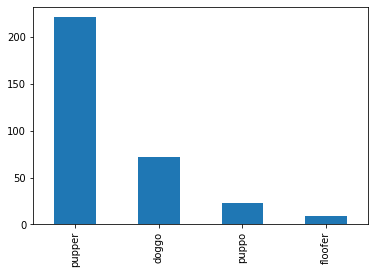

In [800]:
combined_dogs_tweets_df.dog_stage.value_counts().plot(kind='bar')

In [801]:
combined_dogs_tweets_df.groupby(['dog_stage'])['rating_numerator'].mean()

dog_stage
doggo      11.847222
floofer    11.888889
pupper     10.728507
puppo      12.000000
Name: rating_numerator, dtype: float64

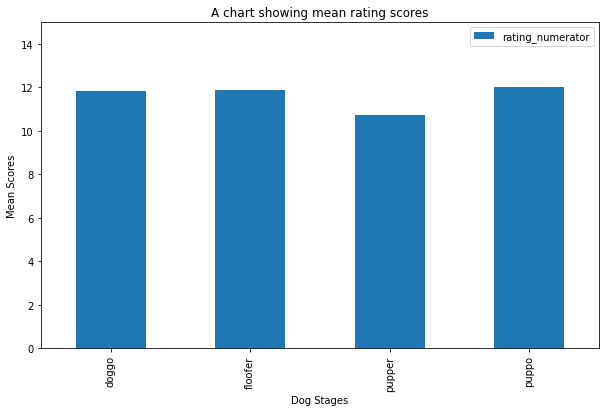

In [852]:
plot = combined_dogs_tweets_df.groupby(['dog_stage'])['rating_numerator'].mean().plot.bar( ylim=(0,15), 
                             figsize=(20,10), legend = True)
plt.xlabel("Dog Stages")
plt.ylabel("Mean Scores")
plt.title('A chart showing mean rating scores')
plt.gcf().set_size_inches((10, 6))
plt.show();



In [853]:
plot.figure.savefig('mean-ratings.png')

#### Insight
The mean rating for puppo is highest. Puppo dogs are more likely to be rated high. Pupper dogs are rated lowest.

### Question # 2
Does dog rating have any relationship with the favourite count and the number of re-tweets?

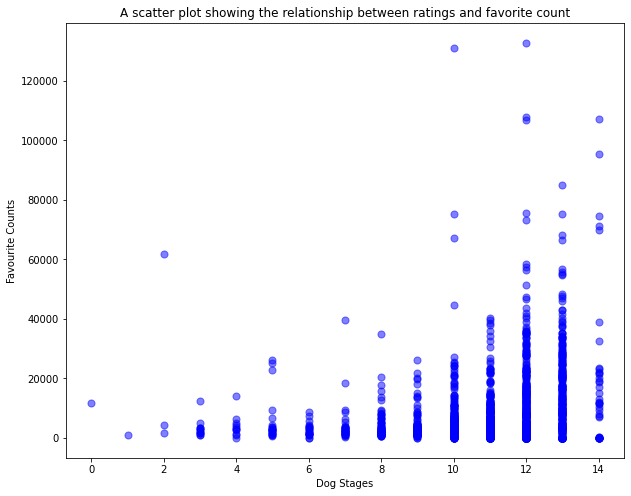

In [808]:
show_fav_relationship_plot= combined_dogs_tweets_df.plot.scatter(x='rating_numerator',
                                    y='favorite_count',
                                    s=50, 
                                    c='b', 
                                    alpha=0.5,
                                     )
plt.title('A scatter plot showing the relationship between ratings and favorite count')
plt.xlabel("Dog Stages")
plt.ylabel("Favourite Counts")
plt.gcf().set_size_inches((10, 8))
plt.show();

In [809]:
show_fav_relationship_plot.figure.savefig('show-rel-favourite-ratings.png')

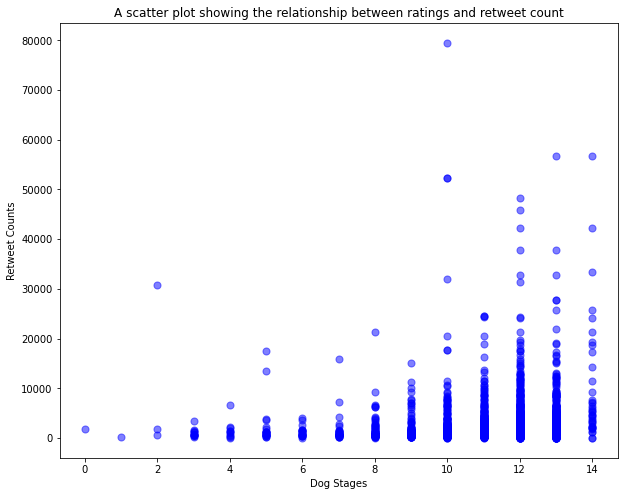

In [811]:
show_relationship_plot= combined_dogs_tweets_df.plot.scatter(x='rating_numerator',
                                    y='retweet_count',
                                    s=50, 
                                    c='b', 
                                    alpha=0.5,
                                     )
plt.title('A scatter plot showing the relationship between ratings and retweet count')
plt.xlabel("Dog Stages")
plt.ylabel("Retweet Counts")
plt.gcf().set_size_inches((10, 8))
plt.show();

In [812]:
show_relationship_plot.figure.savefig('show-rel-retweet-ratings.png')

#### Insight
As dog rating increases to 14, the retweet and the favourite counts increases.

### Question #3

Does the sentiment of the text have any impact on the favourite count. What about the rating scores?

In [813]:

#Compute the polarity and sentiment scores using lambda
text_polarity = lambda x: TextBlob(x).sentiment.polarity
text_subjectivity  = lambda x: TextBlob(x).sentiment.subjectivity

combined_dogs_tweets_df['polarity'] = combined_dogs_tweets_df['text'].apply(text_polarity)
combined_dogs_tweets_df['subjectivity'] = combined_dogs_tweets_df['text'].apply(text_subjectivity)
combined_dogs_tweets_df[['text', 'rating_numerator', 'subjectivity']]

,text,rating_numerator,subjectivity
0,phineas hes mystical boy ever appears hole donut,13,0.000000
1,tilly shes checking pup hopes youre ok shes available pats snugs boops whole bit,13,0.433333
2,archie rare norwegian pouncing corgo lives tall grass never know one may strike,12,0.450000
3,darla commenced snooze mid meal happens best us,13,0.150000
4,franklin would like stop calling cute fierce shark respected barkweek,12,1.000000
...,...,...,...
2070,two miniature golden retrievers webbed paws dont walk efficiently cant catch tennis ball,4,0.500000
2071,meet phred isnt steering looking road wearing seatbelt phred rolling tornado danger,6,0.000000
2072,toby asked chocolate cake birthday given vanilla instead itll ok toby,8,0.500000
2073,yea cant handle job anymore dogs adorable,12,1.000000


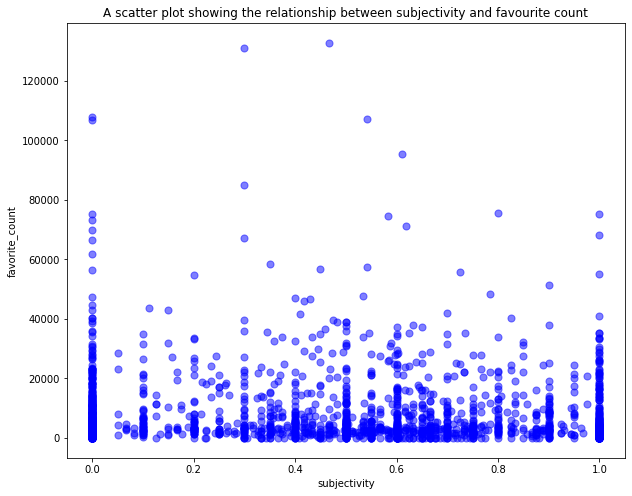

In [814]:
show_sentiment_plot1= combined_dogs_tweets_df.plot.scatter(x='subjectivity',
                                    y='favorite_count',
                                    s=50, 
                                    c='b', 
                                    alpha=0.5,
                                     )
plt.title('A scatter plot showing the relationship between subjectivity and favourite count')
plt.gcf().set_size_inches((10, 8))
plt.show();

In [815]:
show_sentiment_plot1.figure.savefig('show-rel-favourite-subjectivity.png')

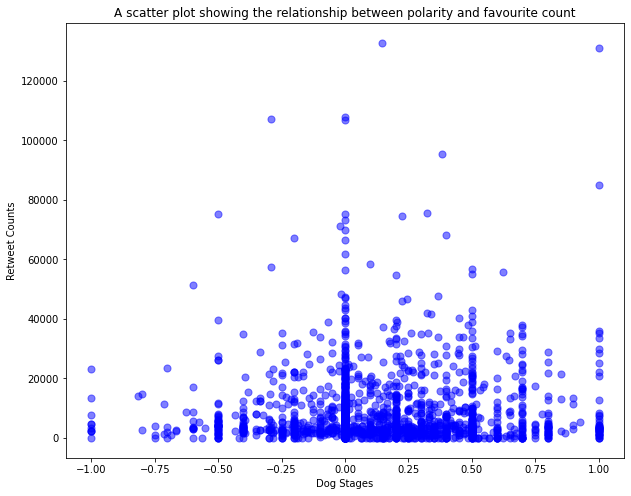

In [818]:
show_sentiment_plot2= combined_dogs_tweets_df.plot.scatter(x='polarity',
                                    y='favorite_count',
                                    s=50, 
                                    c='b', 
                                    alpha=0.5,
                                     )
plt.xlabel("Dog Stages")
plt.ylabel("Retweet Counts")
plt.title('A scatter plot showing the relationship between polarity and favourite count')
plt.gcf().set_size_inches((10, 8))
plt.show();

In [819]:
show_sentiment_plot2.figure.savefig('show-rel-favourite-polarity.png')

#### Insight
Most tweets are positive. Thus opinions held about the dogs show good remarks.
The sentiments (subjectivity) are spread. Some are highly subjective while others are also low.

## Conclusion
After carefully cleaning the data for analysis, a comprehensive report (data wrangling and report) has been attached for further reading. 
<br>
